# 03. PyTorch Computer Vision

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


In [1]:
# Import PyTorch
import torch
from torch import nn

# Import Torchvision
import torchvision
from torchvision import datasets 
from torchvision import transforms
from torchvision.transforms import ToTensor

## 1. Gettin a dataset 

In [2]:
# Setup training data 
train_data = torchvision.datasets.FashionMNIST(
    root="data", # where to download data?
    train=True, # do we want train data or only test data?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None, # how do we want to transform the target?
    download=True 
)

# Setup testing data 
test_data = torchvision.datasets.FashionMNIST(
    root="data", 
    train=False, 
    transform=ToTensor(), 
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# Check the data
image, label = train_data[0]

In [5]:
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
# Check the class names
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
# Check class index
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
print(f"Image shape: {image.shape}: -> [color_channels, height, width]")
print(f"Image Label : {class_names[label]}")

Image shape: torch.Size([1, 28, 28]): -> [color_channels, height, width]
Image Label : Ankle boot


(-0.5, 27.5, 27.5, -0.5)

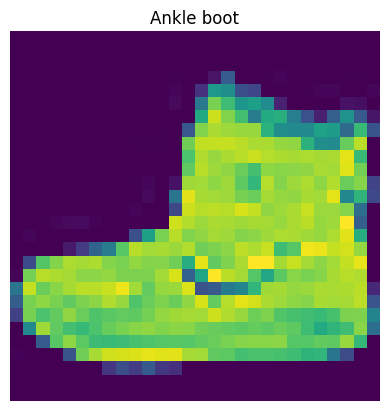

In [10]:
# Visualizing the data 
import matplotlib.pyplot as plt 

image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis(False)

(-0.5, 27.5, 27.5, -0.5)

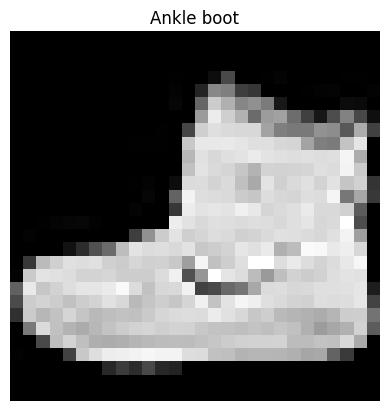

In [11]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

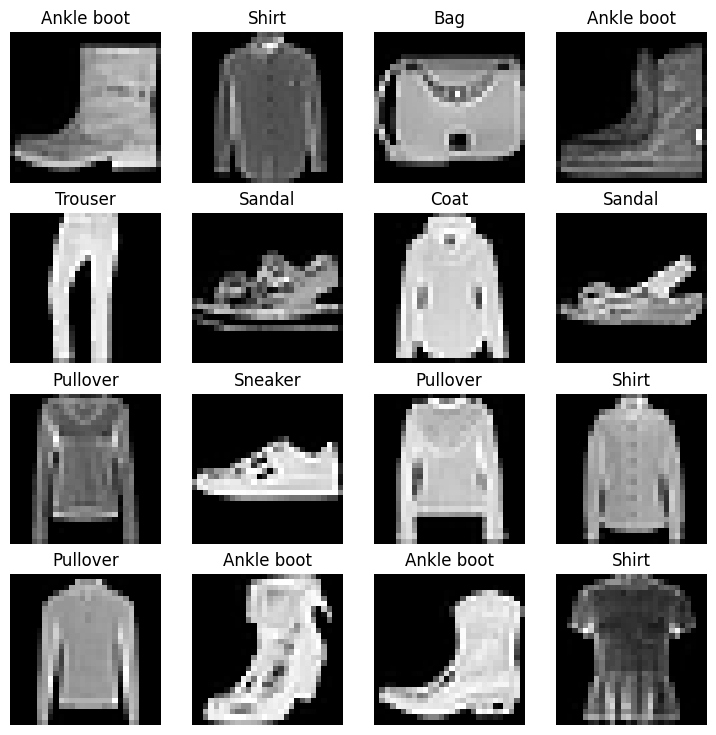

In [12]:
# Plot some more random images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4 
for i in range(1, rows*cols+1): 
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)
    

## 2. Prepare DataLoader

Now we've got a dataset ready to go.

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader` for short.

The `DataLoader` helps load data into a model for training and for inference. It turns a large `Dataset` into a Python iterable of smaller chunks. These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

Why do this?

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once. But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches.

It also gives your model more opportunities to improve.

With **mini-batches** (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

What's a good batch size?

[32 is a good place to start](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) for a fair amount of problems.

But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

![an example of what a batched dataset looks like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*Batching FashionMNIST with a batch size of 32 and shuffle turned on. A similar batching process will occur for other datasets but will differ depending on the batch size.*

Let's create `DataLoader`'s for our training and test sets. 

In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE, 
                             shuffle=True)  # It is necessary to shuffle train data 

test_dataloader = DataLoader(dataset=test_data, 
                            batch_size=BATCH_SIZE, 
                            shuffle=False)  # It is not necessary to shuffle test data 

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x26002746a50>,
 <torch.utils.data.dataloader.DataLoader at 0x260022de270>)

In [14]:
# Let's check out 
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [15]:
# Check out what's inside dataloader 
train_features_batch, train_labels_batch = next(iter(train_dataloader))
test_features_batch, test_labels_batch =  next(iter(test_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Image Label: Shirt, label_size: torch.Size([])


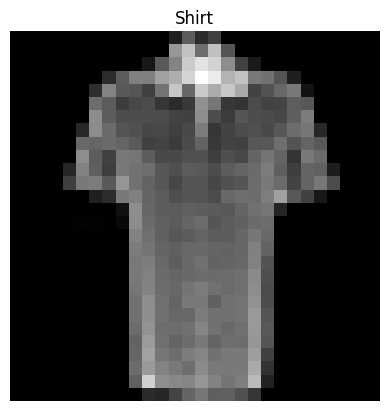

In [16]:
# let's visualize a sample 
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx] 
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Image Label: {class_names[label]}, label_size: {label.shape}")

## 3. Model 0: Build a baseline model

Time to build a **baseline model** by subclassing `nn.Module`. A **baseline model** is one of the simplest models you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

Our baseline will consist of two [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers.

We've done this in a previous section but there's going to be one slight difference. Because we're working with image data, we're going to use a different layer to start things off.

And that's the [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer.

`nn.Flatten()` compresses the dimensions of a tensor into a single vector.

This is easier to understand when you see it.

In [17]:
# Create a flatten layer 
flatten_layer = nn.Flatten() 

# Take a single samle 
x = train_features_batch[0] 

# Forward Pass 
output = flatten_layer(x)

print(f"Input shape: {x.shape} -> [color_channels, height, width]") 
print(f"output shape: {output.shape} -> [color_channels, height*width]")

Input shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
output shape: torch.Size([1, 784]) -> [color_channels, height*width]


In [18]:
from torch import nn 

class FashionMNISTV0(nn.Module): 
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int, 
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=input_shape, 
                     out_features=hidden_units), 
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x): 
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

model_0 = FashionMNISTV0(
    input_shape=28*28, 
    hidden_units=10, 
    output_shape=len(class_names)
) 

model_0

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics 


In [22]:
# helper_functions.py already downloaded
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

### 3.2 Creating a function to time our experiments 

In [23]:
from timeit import default_timer as timer

def print_train_timer(start: float,
                     end: float, 
                     device=None):
    total_time = end-start
    print(f"\nTotal time {total_time:.3f} seconds trained on {device}")
    return total_time

### 3.3 Creating a training loop and training a model on batches of data

Let's now create a training loop and a testing loop to train and evaluate our model.

We'll be using the same steps as the previous notebook(s), though since our data is now in batch form, we'll add another loop to loop through our data batches.

Our data batches are contained within our `DataLoader`s, `train_dataloader` and `test_dataloader` for the training and test data splits respectively.

A batch is `BATCH_SIZE` samples of `X` (features) and `y` (labels), since we're using `BATCH_SIZE=32`, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.

This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader. 

Let's step through it: 
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [24]:
# import tqdm 
from tqdm.auto import tqdm 

# set manual seed and start timer 
torch.manual_seed(42)
start_time = timer() 

# Create training loop 
epochs = 3 
for epoch in tqdm(range(epochs)): 
    print(f"\nEpoch: {epoch}\n---")
    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        ### Training  
        model_0.train()
        
        # 1. Forward pass
        y_pred = model_0(X) 

        # 2. Calculate loss per batch
        loss = loss_fn(y_pred, y) 
        train_loss += loss
        # acc = accuracy_fn(y, y_pred) 

        # 3. Optimizer zero grad 
        optimizer.zero_grad() 

        # 4. Loss backward 
        loss.backward() 

        # 5. step optimizer 
        optimizer.step() 

        # print out what's happening 
        if batch % 400 == 0: 
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

    # calculate the train loss average per batch
    train_loss /= len(train_dataloader)

    ### Testing 
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode(): 
        for X_test, y_test in test_dataloader: 

            # 1. Forward pass 
            test_pred = model_0(X_test) 

            # 2. Calculate loss and accuracy 
            test_loss += loss_fn(test_pred, y_test) 
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

        # calculate the test looss anc accuracy average per batch 
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    # Print out what's happening 
    print(f"Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")

# Calculating training time 
end_time = timer() 
total_train_time_model_0 = print_train_timer(start=start_time, 
                 end=end_time,
                 device=str(next(model_0.parameters()).device))
total_train_time_model_0
        
    

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.59039 | Test Loss: 0.50954 | Test Acc: 82.04

Epoch: 1
---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.47633 | Test Loss: 0.47989 | Test Acc: 83.20

Epoch: 2
---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.45503 | Test Loss: 0.47664 | Test Acc: 83.43

Total time 18.942 seconds trained on cpu


18.942005700082518

## 4. Make predictions and get `model_0` results

Since we're going to be building a few models, it's a good idea to write some code to evaluate them all in similar ways.

Namely, let's create a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [25]:
# create an evaluation funcion 
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
              dataloader: torch.utils.data.dataloader, 
              loss_fn: torch.nn.Module,
              accuracy_fn):
    """ Returns a dictinoary containing the results of model predicting on dataloader """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode(): 
        for X, y in tqdm(dataloader): 
            # Make predictions 
            y_pred = model(X)

            # Accumulate loss and accuracy 
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))

        # scale loss and accuracy 
        loss /= len(dataloader)
        acc /= len(dataloader) 

    return {"model_name": model.__class__.__name__, # only works when the model was created with a class
           "model_loss": loss.item(),
           "model_accuracy": acc}

# calculate the model_0 results 
model_0_results = eval_model(model=model_0, 
                             dataloader=test_dataloader, 
                             loss_fn=loss_fn, 
                             accuracy_fn=accuracy_fn)

model_0_results
            

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

## 5. Setup device agnostic code 

In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

We'll do so by recreating a similar model to before, except this time we'll put non-linear functions (`nn.ReLU()`) in between each linear layer.

In [27]:
class FashionMNISV1(nn.Module): 
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int, 
                 output_shape: int):
        super().__init__() 
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Flatten the inputs into a single vector 
            nn.Linear(in_features=input_shape, out_features=hidden_units), 
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=output_shape), 
            nn.ReLU()
        )

    def forward(self, x): 
        return self.layer_stack(x)

In [28]:
# create an instance of the model and send to device 
torch.manual_seed(42)
model_1 = FashionMNISV1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)

### 6.1 Setup loss and optimizer

In [29]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

### 6.2 Functionizing training and testing/evaluating loop
Let's create a function for: 
- training loop - `train_step()`
- testing loop - `test_step()`

In [30]:
torch.manual_seed(42)

def train_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.dataloader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer, 
               accuracy_fn, 
               device: torch.device = device):
    """ Performs a training with model trying to learn on data_loader """
    train_loss, train_acc = 0, 0 

    # Put model in trainig mode 
    model.to(device)
    model.train()

    # Add a loop to loop throught the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data in the target device 
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X) 

        # 2. Calculate loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

        # 3. Optimizer zero grad 
        optimizer.zero_grad() 

        # 4. Loss backward 
        loss.backward() 

        # 5. step optimizer 
        optimizer.step() 

    # calculate the train loss and train acc average per batch
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%")

In [31]:
def test_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.dataloader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer, 
               accuracy_fn, 
               device: torch.device = device):
    """ Performs a testing step on model going over data_loader """
    test_loss, test_acc = 0, 0 

    # Put model in trainig mode 
    model.to(device)
    model.eval()

    with torch.inference_mode(): 
        # Add a loop to loop throught the training batches
        for batch, (X, y) in enumerate(data_loader):
            # Put data in the target device 
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred = model(X) 
    
            # 2. Calculate loss per batch
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))

        # calculate the train loss and train acc average per batch
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        
    print(f"Test Loss:  {test_loss:.5f} | Test Acc: {test_acc:.2f}%\n")


In [32]:
torch.manual_seed(42)

# Set timer 
from timeit import default_timer as timer 
start_time_gpu = timer() 

epochs = 3 

# create optimization and evaluation loop using train_step() and test_step() 
for epoch in tqdm(range(epochs)): 
    print(f"Epoch: {epoch}\n----------")
    train_step(model=model_1, 
              data_loader=train_dataloader, 
              loss_fn=loss_fn, 
              optimizer=optimizer, 
              accuracy_fn=accuracy_fn, 
              device=device) 
    test_step(model=model_1, 
             data_loader=test_dataloader, 
             loss_fn=loss_fn, 
             optimizer=optimizer, 
             accuracy_fn=accuracy_fn, 
             device=device)

# set timer and caluclate the time
end_time_gpu = timer() 
total_train_time_model_1 = print_train_timer(start=start_time_gpu, 
                 end=end_time_gpu, 
                 device=device)

total_train_time_model_1

    


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train Loss: 1.09199 | Train Acc: 61.34%
Test Loss:  0.95636 | Test Acc: 65.00%

Epoch: 1
----------
Train Loss: 0.78101 | Train Acc: 71.93%
Test Loss:  0.72227 | Test Acc: 73.91%

Epoch: 2
----------
Train Loss: 0.67027 | Train Acc: 75.94%
Test Loss:  0.68500 | Test Acc: 75.02%


Total time 25.070 seconds trained on cuda


25.07026379997842

In [33]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code 
model_1_results = eval_model(model=model_1, 
    dataloader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn) 
model_1_results 

  0%|          | 0/313 [00:00<?, ?it/s]

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

It looks like our `eval_model()` function errors out with:

> `RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)`

It's because we've setup our data and model to use device-agnostic code but not our evaluation function.

How about we fix that by passing a target `device` parameter to our `eval_model()` function?

Then we'll try calculating the results again.

In [113]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader, desc='Evaluating'):
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_accuracy": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

Evaluating:   0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISV1',
 'model_loss': 0.6850008368492126,
 'model_accuracy': 75.01996805111821}

In [35]:
print(model_0_results) 
total_train_time_model_0

{'model_name': 'FashionMNISTV0', 'model_loss': 0.47663894295692444, 'model_accuracy': 83.42651757188499}


18.942005700082518

## 7. Model 2: Building a Convolutional Neural Network (CNN)

It's time to create a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements. 

### What model should I use?

> **Question:** Wait, you say CNN's are good for images, are there any other model types I should be aware of?

Good question.

This table is a good general guide for which model to use (though there are exceptions).

| **Problem type** | **Model to use (generally)** | **Code example** |
| ----- | ----- | ----- |
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [XGBoost library](https://xgboost.readthedocs.io/en/stable/) |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) | 

> **Note:** The table above is only for reference, the model you end up using will be highly dependent on the problem you're working on and the constraints you have (amount of data, latency requirements).

Enough talking about models, let's now build a CNN that replicates the model on the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

![TinyVGG architecture, as setup by CNN explainer website](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

To do so, we'll leverage the [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.


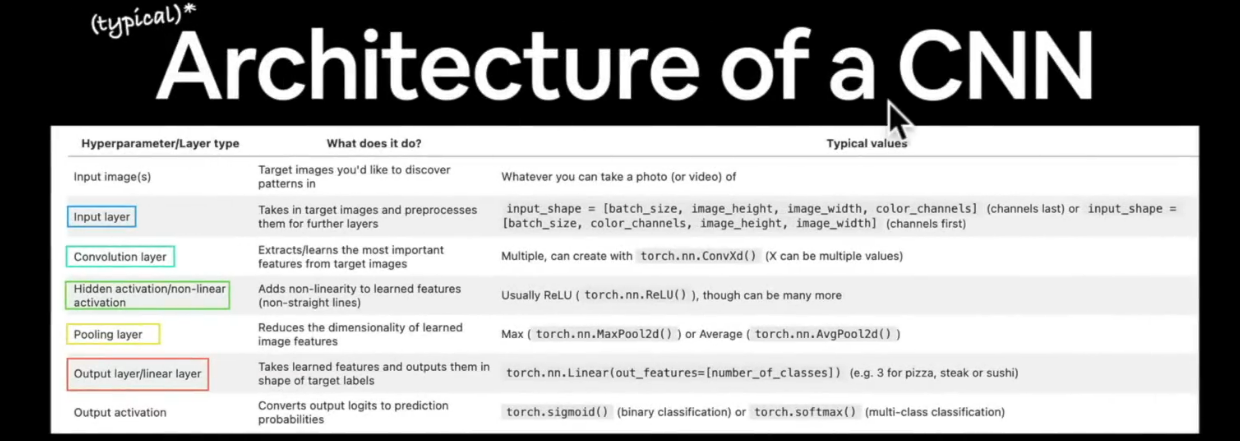

In [36]:
# Create a convolution neural network 
class FashionMNISTModelV2(nn.Module): 
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int): 
        super().__init__() 
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(), 
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2)
        ) 

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1), 
            nn.ReLU(), 
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        ) 
        
    def forward(self, x): 
        x = self.conv_block_1(x) 
        x = self.conv_block_2(x)
        x = self.classifier(x) 
        return x
        

In [37]:
# create instance of the model 
torch.manual_seed(42) 
model_2 = FashionMNISTModelV2(input_shape=1, 
                              hidden_units=10, 
                              output_shape=len(class_names)).to(device)

### 7.1 Stepping through `nn.Conv2d()`

We could start using our model above and see what happens but let's first step through the two new layers we've added:
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), also known as a convolutional layer.
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html), also known as a max pooling layer.

> **Question:** What does the "2d" in `nn.Conv2d()` stand for?
>
> The 2d is for 2-dimensional data. As in, our images have two dimensions: height and width. Yes, there's color channel dimension but each of the color channel dimensions have two dimensions too: height and width.
>
> For other dimensional data (such as 1D for text or 3D for 3D objects) there's also `nn.Conv1d()` and `nn.Conv3d()`. 

To test the layers out, let's create some toy data just like the data used on CNN Explainer.

In [38]:
torch.manual_seed(42)

# create a batch of images 
images = torch.randn([32, 3, 64, 64]) 
test_image = images[0] 

print(f"Images barch shape: {images.shape}") 
print(f"Single image shape: {test_image.shape}")
print()
print(f"Test Image: {test_image}")

Images barch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])

Test Image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [39]:
# create a single convolution layer 
torch.manual_seed(42) 

conv_layer = nn.Conv2d(in_channels=3, 
                       out_channels=10, 
                       kernel_size=3, 
                       stride=1, 
                       padding=1)

# Pass the test image throught the conv layer 
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`
Now let's check out what happens when we move data through `nn.MaxPool2d()`.

In [40]:
print(f"test_image original shape: {test_image.shape}")

# Create a maxpool2d layer 
maxpool_layer = nn.MaxPool2d(kernel_size=2)

test_image_after_conv = conv_layer(test_image) 
print(f"Shape of after going through conv_layer: {test_image_after_conv.shape}") 

test_image_after_conv_and_maxpool = maxpool_layer(test_image_after_conv)
print(f"Shape of after going through conv_layer and maxpool: {test_image_after_conv_and_maxpool.shape}")

test_image original shape: torch.Size([3, 64, 64])
Shape of after going through conv_layer: torch.Size([10, 64, 64])
Shape of after going through conv_layer and maxpool: torch.Size([10, 32, 32])


### 7.3 Setup a loss function and optimizer for `model_2`

We've stepped through the layers in our first CNN enough. 

But remember, if something still isn't clear, try starting small. Pick a single layer of a model, pass some data through it and see what happens.

Now it's time to move forward and get to training!

Let's setup a loss function and an optimizer.

We'll use the functions as before, `nn.CrossEntropyLoss()` as the loss function (since we're working with multi-class classification data).

And `torch.optim.SGD()` as the optimizer to optimize `model_2.parameters()` with a learning rate of `0.1`.

In [41]:
# setup loss function/eval metrics/optimizer 
from helper_functions import accuracy_fn

loss_fn = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

We'll use our `train_step()` and `test_step()` functions we created before.

We'll also measure the time to compare it to our other models.

In [42]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42) 

# Measure time
start_time_model_2 = timer() 

# Train and test model 
epochs = 3 

for epoch in tqdm(range(epochs)): 
    print(f"Epoch: {epoch}\n----------")
    
    ### Training 
    train_step(model=model_2, 
               data_loader=train_dataloader, 
               loss_fn=loss_fn, 
               optimizer=optimizer, 
               accuracy_fn=accuracy_fn, 
               device=device) 

    ### Testing 
    test_step(model=model_2, 
              data_loader=test_dataloader, 
              loss_fn=loss_fn, 
              optimizer=optimizer, 
              accuracy_fn=accuracy_fn, 
              device=device) 

end_time_model_2 = timer() 

total_train_time_model_2 = print_train_timer(start=start_time_model_2, 
                                             end=end_time_model_2, 
                                             device=device)
total_train_time_model_2

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train Loss: 0.59168 | Train Acc: 78.60%
Test Loss:  0.39900 | Test Acc: 85.99%

Epoch: 1
----------
Train Loss: 0.35973 | Train Acc: 87.06%
Test Loss:  0.35056 | Test Acc: 87.20%

Epoch: 2
----------
Train Loss: 0.32311 | Train Acc: 88.20%
Test Loss:  0.31435 | Test Acc: 88.56%


Total time 31.817 seconds trained on cuda


31.816684000077657

In [43]:
# Get model_2 results 

model_2_results = eval_model(model=model_2, 
                             data_loader=test_dataloader, 
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3143523037433624,
 'model_accuracy': 88.55830670926518}

## 8. Compare model results and training time

We've trained three different models.
1. `model_0` - our baseline model with two `nn.Linear()` layers.
2. `model_1` - the same setup as our baseline model except with `nn.ReLU()` layers in between the `nn.Linear()` layers.
3. `model_2` - our first CNN model that mimics the TinyVGG architecture on the CNN Explainer website.

In [44]:
import pandas as pd 

# Create a dataframe containing the model results 
compare_results = pd.DataFrame([model_0_results, 
                               model_1_results, 
                               model_2_results])
compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTV0,0.476639,83.426518
1,FashionMNISV1,0.685001,75.019968
2,FashionMNISTModelV2,0.314352,88.558307


In [45]:
# Add training time to results comparision 
compare_results['training_time'] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_accuracy,training_time
0,FashionMNISTV0,0.476639,83.426518,18.942006
1,FashionMNISV1,0.685001,75.019968,25.070264
2,FashionMNISTModelV2,0.314352,88.558307,31.816684


It looks like our CNN (`FashionMNISTModelV2`) model performed the best (lowest loss, highest accuracy) but had the longest training time.

And our baseline model (`FashionMNISTModelV0`) performed better than `model_1` (`FashionMNISTModelV1`).

### Performance-speed tradeoff

Something to be aware of in machine learning is the **performance-speed** tradeoff.

Generally, you get better performance out of a larger, more complex model (like we did with `model_2`).

However, this performance increase often comes at a sacrifice of training speed and inference speed.

> **Note:** The training times you get will be very dependent on the hardware you use. 
>
> Generally, the more CPU cores you have, the faster your models will train on CPU. And similar for GPUs.
> 
> Newer hardware (in terms of age) will also often train models faster due to incorporating technological advances.


In [46]:
# Visualize the model results 

Text(0, 0.5, 'model')

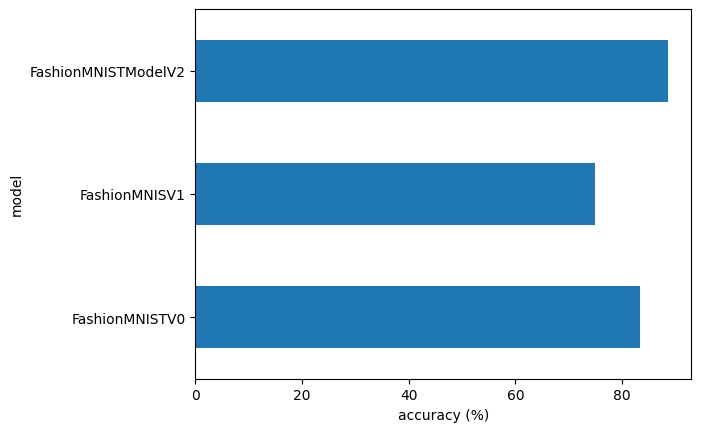

In [47]:
compare_results.set_index('model_name')['model_accuracy'].plot(kind='barh')
plt.xlabel("accuracy (%)") 
plt.ylabel('model')

## 9. Make and evaluate random predictions with best model

In [63]:
def make_predictions(model: torch.nn.Module, 
                     data: list, 
                     device: torch.device = device): 
    """ Returns tensor containing the predictions got from the model passed """
    pred_probs = []
    model.to(device)
    model.eval() 
    with torch.inference_mode(): 
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device)
            # Forward Pass
            pred_logit = model(sample) 

            # Get prediction probabilities (logits --> pred probs)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn lists into tensor
    return torch.stack(pred_probs)
            
        

(-0.5, 27.5, 27.5, -0.5)

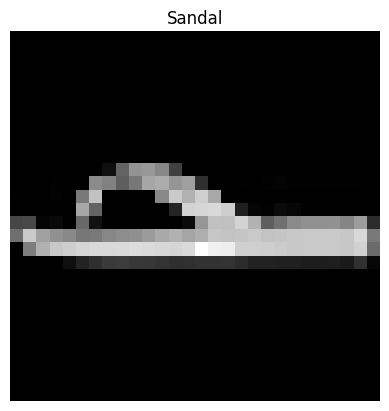

In [87]:
# Getting some random samples

import random
# random.seed(42) 

# Create empty lists for sample images and labels 
test_samples = [] 
test_labels = [] 

for sample, label in random.sample(list(test_data), k=9): 
    test_samples.append(sample) 
    test_labels.append(label) 

# View the first sample 
plt.imshow(test_samples[0].squeeze(), cmap='gray') 
plt.title(class_names[test_labels[0]])
plt.axis(False)

Now we can use our `make_predictions()` function to predict on `test_samples`.

In [88]:
# Make prediction  
pred_probs = make_predictions(model=model_2, 
                              data=test_samples, 
                              device=device)

# View first two predictions 
pred_probs[:2]

tensor([[2.4602e-05, 8.6778e-07, 2.2847e-05, 3.0821e-04, 4.8374e-07, 9.9706e-01,
         7.9551e-06, 8.9845e-04, 1.6765e-03, 8.2250e-07],
        [1.5690e-01, 9.4288e-04, 2.4471e-01, 9.1920e-03, 5.8646e-03, 2.1032e-04,
         5.7656e-01, 5.5251e-04, 4.7395e-03, 3.3426e-04]])

Convert prediction probabilities to prediction labels by taking the `torch.argmax()` of the output of the `torch.softmax()` activation function.

In [89]:
# Convert prediction probabilities to labels 
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 6, 0, 1, 2, 2, 1, 4, 4])

In [90]:
test_labels

[5, 2, 0, 1, 2, 2, 1, 4, 4]

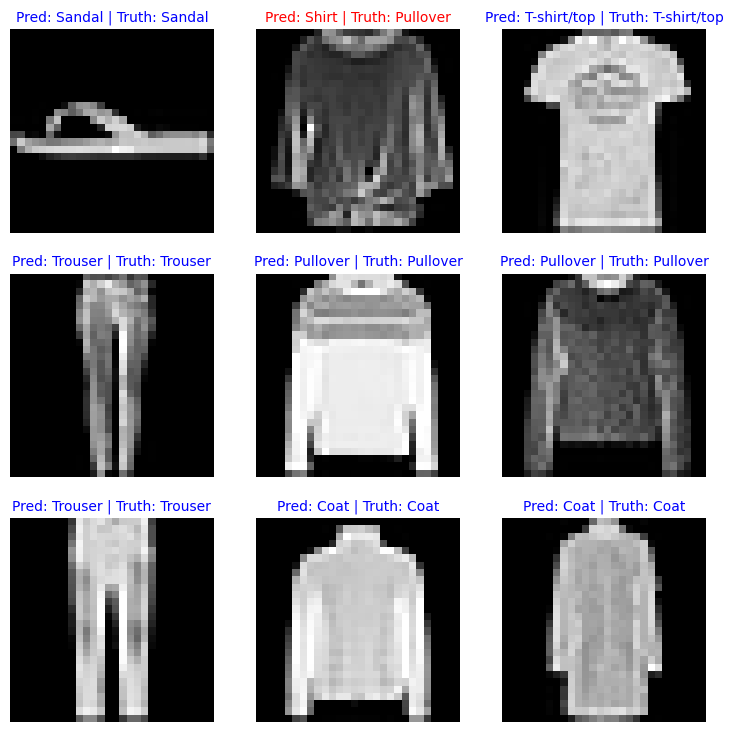

In [91]:
# Plot predictions 
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples): 
    # Create subplot 
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image 
    plt.imshow(sample.squeeze(), cmap="gray") 

    # Find the prediction (in text form e.g 'sandal')
    pred_label = class_names[pred_classes[i]] 

    # Get the truth label 
    truth_label = class_names[test_labels[i]] 

    # Create title for the plot 
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check equality for the prediction and truth and change the color of title text 
    if pred_label ==  truth_label: 
        plt.title(title_text, fontsize=10, c="b") 
    else: 
        plt.title(title_text, fontsize=10, c="r")

    plt.axis(False)


        
    

## 10. Making a confusion matrix for further prediction evaluation

There are many [different evaluation metrics](https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics) we can use for classification problems. 

One of the most visual is a [confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

A confusion matrix shows you where your classification model got confused between predictions and true labels.

To make a confusion matrix, we'll go through three steps:
1. Make predictions with our trained model, `model_2` (a confusion matrix compares predictions to true labels).
2. Make a confusion matrix using [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).

In [96]:
from tqdm.auto import tqdm 

# 1. Make predictions with trained model
y_preds = [] 
model_2.eval() 
with torch.inference_mode(): 
    for X, y in tqdm(test_dataloader, desc="Making predictions"): 
        # Send the data to device
        X, y = X.to(device), y.to(device)
        # Forward pass 
        y_logit = model_2(X)
        # get pred_classes [logits -> probs -> labels]
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1) 
        # Put predictions on CPU for evvaluation 
        y_preds.append(y_pred.cpu())

# Concatenate the list of preds into a tensor 
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor[:10]

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [99]:
len(y_preds_tensor)

10000

Now we've got predictions, let's go through steps 2 & 3:
2. Make a confusion matrix using [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).

First we'll need to make sure we've got `torchmetrics` and `mlxtend` installed (these two libraries will help us make and visualize a confusion matrix). 

In [100]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.3


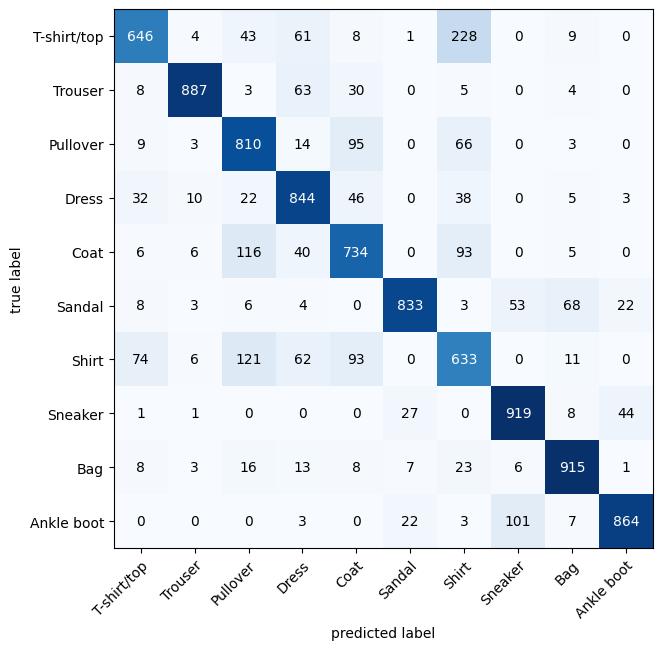

In [102]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets 
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_preds_tensor, 
                         target=test_data.targets)

# 3. Plot the confusino matrix 
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # Matplotlib likes working with numpy'
    class_names=class_names, 
    figsize=(10,7))


## 11. Save and load best performing model

Recall from [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/#5-saving-and-loading-a-pytorch-model) we can save and load a PyTorch model using a combination of:
* `torch.save` - a function to save a whole PyTorch model or a model's `state_dict()`. 
* `torch.load` - a function to load in a saved PyTorch object.
* `torch.nn.Module.load_state_dict()` - a function to load a saved `state_dict()` into an existing model instance.

You can see more of these three in the [PyTorch saving and loading models documentation](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

For now, let's save our `model_2`'s `state_dict()` then load it back in and evaluate it to make sure the save and load went correctly. 

In [106]:
from pathlib import Path

# create model directory path 
MODEL_PATH = Path('models') 
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save 
MODEL_NAME = "03-Computer_Vision_PyTorch.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\03-Computer_Vision_PyTorch.pth


Now we've got a saved model `state_dict()` we can load it back in using a combination of `load_state_dict()` and `torch.load()`.

Since we're using `load_state_dict()`, we'll need to create a new instance of `FashionMNISTModelV2()` with the same input parameters as our saved model `state_dict()`.

In [111]:
# create an instant of the FashionMNISTModelV2 (the same class our saved the state dict)
# Note loading the model with shapes different the saved version will cause error
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                     hidden_units=10, 
                                     output_shape=10)

# Load in the saved state dict 
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU 
loaded_model_2.to(device)

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3028\4140987265.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [114]:
# Evaluate the model 
loaded_model_2_results = eval_model(model=loaded_model_2, 
                                    data_loader=test_dataloader, 
                                    loss_fn=loss_fn, 
                                    accuracy_fn=accuracy_fn, 
                                    device=device)

loaded_model_2_results

Evaluating:   0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3143523037433624,
 'model_accuracy': 88.55830670926518}

In [123]:
# Check if saved and loaded model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']),  # saved model results (loss)
              torch.tensor(loaded_model_2_results['model_loss']), # loaded model results (loss)
              atol=1e-02)  # absolute tolerance


tensor(True)